In [183]:
import seaborn as sns
import matplotlib as plt
import pandas as pd
import numpy as np
import os
import glob

## Grab data

In [184]:
currdir = os.path.curdir
filepath = os.path.join(os.getcwd(), "log_data")
filepath

'/home/nlantau/.config/scripts/log_data'

In [185]:
filepaths = sorted(glob.glob(filepath + '/2021*.log'))

In [186]:
date_dict = {}

for i,f in enumerate(filepaths):
    fs = f.strip(filepath)
    
    date_dict[fs] = []
    min_day = 0

    with open(f, 'r') as r:
        all_minutes_of_the_day = r.readlines()
        all_minutes_of_the_day = [line.strip() for line in all_minutes_of_the_day]
        
        date_dict[fs] = [len(all_minutes_of_the_day)]

# Prepare data

## Create DataFrame from Dictionary

In [187]:
date_dict
df = pd.DataFrame.from_dict(date_dict, orient='index', columns=['Minutes'])
df.head()

,Minutes
2021-05-09,38
2021-05-10,628
2021-05-11,675
2021-05-12,511
2021-05-13,706


## Create new DataFrame with date as column

In [239]:
rng = pd.date_range('2021-05-09', periods=44)
rd = pd.DataFrame({'Date': rng, 'Minutes': 0})
m = [df["Minutes"][i] for i in range(44)]
rd["Minutes"] = pd.Series(m)
rd.head()

,Date,Minutes
0,2021-05-09,38
1,2021-05-10,628
2,2021-05-11,675
3,2021-05-12,511
4,2021-05-13,706


## Display information about DataFrame 'rd'

In [240]:
rd.describe()
rd.info()
rd.reset_index()
rd.head()
rd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     44 non-null     datetime64[ns]
 1   Minutes  44 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 832.0 bytes


,Minutes
count,44.000000
mean,504.295455
std,192.823643
min,38.000000
25%,382.250000
50%,542.000000
75%,649.250000
max,790.000000


# Plot with Seaborn

In [215]:
sns.set_theme(style="darkgrid")
plt.rcParams['figure.dpi'] = 100

### Scatter plot

In [263]:
#sns.relplot(x=rd.index, y="Minutes", data=rd)


### Plot data and regression model fit

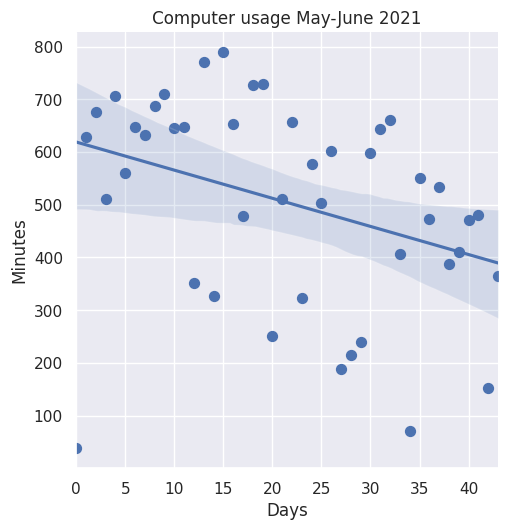

In [256]:
ax = sns.lmplot(x='index', y='Minutes', data=rd.reset_index(), x_estimator=np.mean, order=1)
ax.set(xlabel="Days", ylabel="Minutes", title="Computer usage May-June 2021")

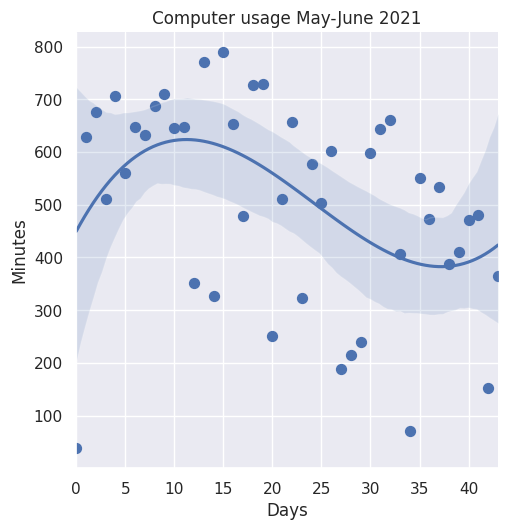

In [257]:
ax = sns.lmplot(x='index', y='Minutes', data=rd.reset_index(), x_estimator=np.mean, order=3)
ax.set(xlabel="Days", ylabel="Minutes", title="Computer usage May-June 2021")

In [261]:
#for i in range(1,4):
 #   ax = sns.lmplot(x='index', y='Minutes', data=rd.reset_index(), x_estimator=np.mean, order=i)
  #  ax.set(xlabel="Days", ylabel="Minutes", title="Computer usage May-June 2021")

### Plot data and a linear regression model fit

In [262]:
#ax = sns.regplot(x='index', y='Minutes', data=rd.reset_index(), x_estimator=np.mean)
#ax.set(xlabel="Days", ylabel="Minutes", title="Computer usage May-June 2021")

### Histogram of data

<AxesSubplot:ylabel='Count'>

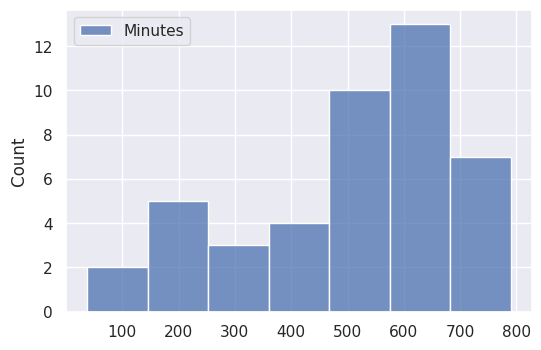

In [227]:
sns.histplot(data=rd)